In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from ssvm.data_structures import CandidateSQLiteDB, HigherRankedCandidatesSQLiteDB, RandomSubsetCandidateSQLiteDB
from matchms.Spectrum import Spectrum

In [2]:
DB = "/home/bach/Documents/doctoral/projects/local_casmi_db/db/use_inchis/DB_LATEST.db"
MS2SCORER ="IOKR__696a17f3"

In [24]:
candidates_all = CandidateSQLiteDB(DB)
candidates_higher = HigherRankedCandidatesSQLiteDB(
    max_number_of_candidates=25, include_correct_candidate=True, ms2scorer=MS2SCORER, db_fn=DB, score_correction_factor=0.98)
candidates_rand = RandomSubsetCandidateSQLiteDB(
    number_of_candidates=25, include_correct_candidate=True, db_fn=DB)

In [25]:
spec = Spectrum(np.array([]), np.array([]), {"spectrum_id": "Challenge-016", "molecule_id": "FGXWKSZFVQUSTL-UHFFFAOYSA-N"})

scores_all = candidates_all.get_ms2_scores(spectrum=spec, ms2scorer=MS2SCORER, return_dataframe=True).assign(ctype="all")
scores_higher = candidates_higher.get_ms2_scores(spectrum=spec, ms2scorer=MS2SCORER, return_dataframe=True, ).assign(ctype="higher")
scores_rand = candidates_rand.get_ms2_scores(spectrum=spec, ms2scorer=MS2SCORER, return_dataframe=True).assign(ctype="rand")

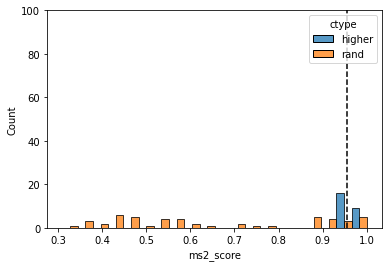

In [28]:
# ax = sns.histplot(data=pd.concat((scores_all, scores_higher, scores_rand)), x="ms2_score", hue="ctype", multiple="dodge", bins=20)
ax = sns.histplot(data=pd.concat((scores_higher, scores_rand)), x="ms2_score", hue="ctype", multiple="dodge", bins=20)
ax.set_ylim(0, 100)
# ax.set_xlim(0.79, 1.01)
plt.vlines(scores_higher.loc[scores_higher["identifier"] == "FGXWKSZFVQUSTL-UHFFFAOYSA-N", "ms2_score"].item(),
           0, 100, color="black", linestyle="--")
#plt.vlines(scores_higher.loc[scores_higher["identifier"] == "FGXWKSZFVQUSTL-UHFFFAOYSA-N", "ms2_score"].item() * 0.98, 
#           0, 100, color="black", linestyle="-.")

In [29]:
candidates_higher.get_ms2_scores(spectrum=spec, ms2scorer=MS2SCORER, return_dataframe=True, scale_scores_to_range=False)

,identifier,ms2_score
0,AYXNRETYRLIJGK-UHFFFAOYSA-N,0.180633
1,DCSSNGSWFUJCOM-UHFFFAOYSA-N,0.178557
2,DGCSOSQLSURUSC-UHFFFAOYSA-N,0.179088
3,DJXYJAGJGYVOFJ-UHFFFAOYSA-N,0.175382
4,DLMHCJLHXNKWGI-UHFFFAOYSA-N,0.176585
5,FGXWKSZFVQUSTL-UHFFFAOYSA-N,0.178846
6,GCDDLJLVQNGUMJ-UHFFFAOYSA-N,0.176624
7,IEVHZIINAJKQBU-UHFFFAOYSA-N,0.176667
8,JCIOEINDUDSZOP-UHFFFAOYSA-N,0.176138
9,JNSLOMYUNNAVBH-UHFFFAOYSA-N,0.180467


In [30]:
candidates_higher.get_ms2_scores(spectrum=spec, ms2scorer=MS2SCORER, return_dataframe=True, scale_scores_to_range=True)

,identifier,ms2_score
0,AYXNRETYRLIJGK-UHFFFAOYSA-N,0.965359
1,DCSSNGSWFUJCOM-UHFFFAOYSA-N,0.954262
2,DGCSOSQLSURUSC-UHFFFAOYSA-N,0.957099
3,DJXYJAGJGYVOFJ-UHFFFAOYSA-N,0.937294
4,DLMHCJLHXNKWGI-UHFFFAOYSA-N,0.943722
5,FGXWKSZFVQUSTL-UHFFFAOYSA-N,0.955805
6,GCDDLJLVQNGUMJ-UHFFFAOYSA-N,0.943932
7,IEVHZIINAJKQBU-UHFFFAOYSA-N,0.944161
8,JCIOEINDUDSZOP-UHFFFAOYSA-N,0.941336
9,JNSLOMYUNNAVBH-UHFFFAOYSA-N,0.964472
